# Support Vector Machine (SVM) Modeling

## Import packages and modules

In [1]:
import csv
import numpy as np
import pandas as pd
import math

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.svm import SVC

## Import data

In [2]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/APassan_Portfolio/Classification_CreditCardFraud/scripts/model_prep.py

### Confirm X and Y Shapes

In [3]:
# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


## Model Building - SVM

Let's first create a baseline SVM model.

In [4]:
# Baseline Model 
svm_baseline = SVC(random_state = 1)
svm_baseline.fit(X_train, Y_train)
Y_pred_svm_baseline = svm_baseline.predict(X_test)



Text(33.0, 0.5, 'Truth')

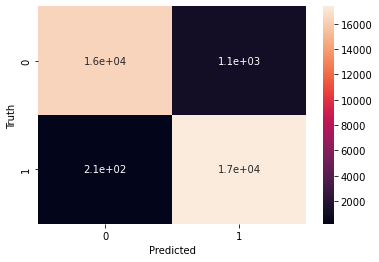

In [5]:
cm_baseline = confusion_matrix(Y_test, Y_pred_svm_baseline)

sns.heatmap(cm_baseline, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [6]:
print(classification_report(Y_test, Y_pred_svm_baseline))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     17372
         1.0       0.94      0.99      0.96     17590

    accuracy                           0.96     34962
   macro avg       0.97      0.96      0.96     34962
weighted avg       0.96      0.96      0.96     34962



### Improve the Model

Now let us run the grid search and cross validation to improve our SVM model.

Specifically we will try to tune our regularization parameter *C* and our *gamma* parameter.

In [7]:
# Find the best parameters
param_grid = {'C': [0.001, 0.1, 1],
              'gamma':[0.1, 1, 10]}

svm_gscv = GridSearchCV(SVC(random_state = 1),
                       param_grid=param_grid, 
                       cv = 5,
                       refit = True,
                       verbose = 2)

svm_gscv.fit(X_train, Y_train)

print(svm_gscv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=0.001, gamma=0.1; total time= 2.8min
[CV] END .................................C=0.001, gamma=0.1; total time= 2.7min
[CV] END .................................C=0.001, gamma=0.1; total time= 2.8min
[CV] END .................................C=0.001, gamma=0.1; total time= 2.7min
[CV] END .................................C=0.001, gamma=0.1; total time= 2.7min
[CV] END ...................................C=0.001, gamma=1; total time= 4.6min
[CV] END ...................................C=0.001, gamma=1; total time= 4.7min
[CV] END ...................................C=0.001, gamma=1; total time= 4.7min
[CV] END ...................................C=0.001, gamma=1; total time= 4.7min
[CV] END ...................................C=0.001, gamma=1; total time= 4.6min
[CV] END ..................................C=0.001, gamma=10; total time= 7.9min
[CV] END ..................................C=0.00

### Final Model

In [8]:
# Improved Model 
svm_fin = SVC(random_state = 1, C = 1, gamma = 1)

svm_fin.fit(X_train, Y_train)

Y_pred_svm_fin = svm_fin.predict(X_test)

Text(33.0, 0.5, 'Truth')

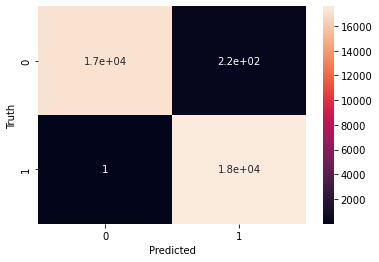

In [9]:
cm_fin = confusion_matrix(Y_test, Y_pred_svm_fin)

sns.heatmap(cm_fin, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
print(classification_report(Y_test, Y_pred_svm_fin))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17372
         1.0       0.99      1.00      0.99     17590

    accuracy                           0.99     34962
   macro avg       0.99      0.99      0.99     34962
weighted avg       0.99      0.99      0.99     34962

